In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import seaborn as snsplt.figure(figsize = (12,8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='clusters', alpha=0.5, palette='PuBuGn')
plt.show()

In [7]:
df=pd.read_csv('Mall_Customers.csv')

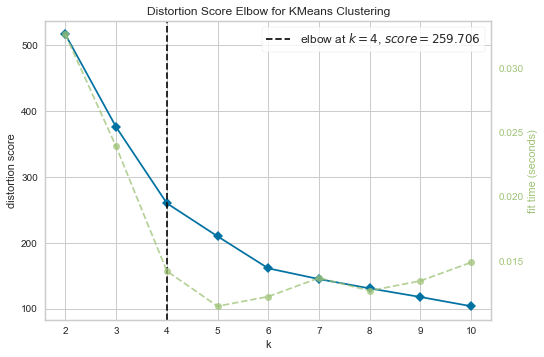

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
pipe = make_pipeline(StandardScaler(), KElbowVisualizer(KMeans()))
pipe.fit(X)
pipe[1].show()

In [17]:
pipe = make_pipeline(StandardScaler(),KMeans(4))
pipe.fit(X)

df['clusters'] = pipe['kmeans'].labels_

<AxesSubplot:xlabel='clusters', ylabel='count'>

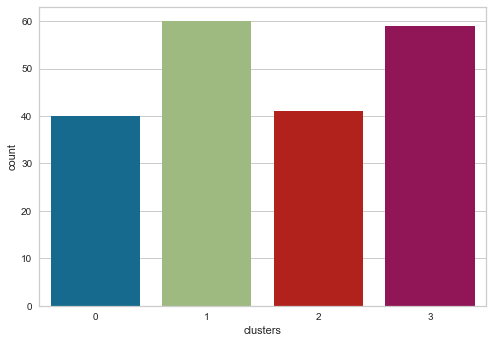

In [18]:
sns.countplot(data=df, x='clusters')

In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'clusters'],
      dtype='object')

In [ ]:
import math

var_list = '''
BALANCE
ONEOFF_PURCHASES_FREQUENCY
PURCHASES
CREDIT_LIMIT
PURCHASES_TRX4

'''.split()

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(nrows=rows, ncols=3, figsize = (20, 5*rows))

for i, ax in zip(var_list, axs.flat):
    sns.barplot(data = df, x='clusters', y=i, ax=ax)
    ax.set(xlabel= '', ylabel='', title=i)
    
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

plt.show()

In [23]:
X = df.select_dtypes('number').copy()
X.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [25]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

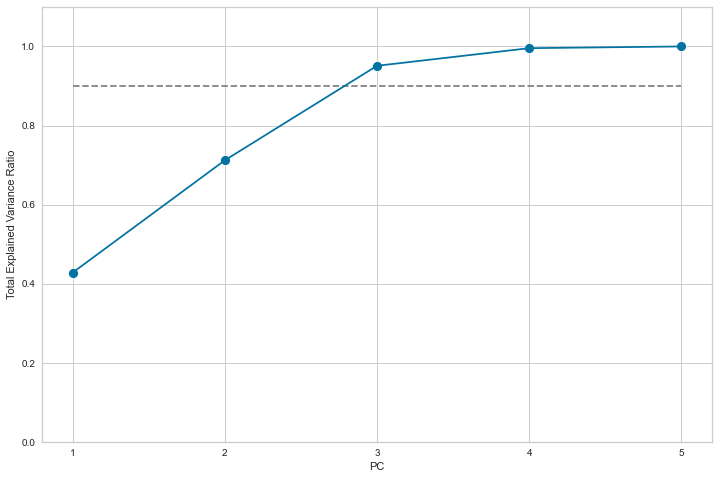

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.show()

In [27]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9))])

In [28]:
pipe['pca'].explained_variance_ratio_.cumsum()

array([0.42801723, 0.71210777, 0.95110547])

In [29]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans(n_clusters=4)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=4))])

In [30]:
values = pipe[:2].transform(X)

pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df = df.join(pd.DataFrame(values, columns=pca_labels))

df['clusters'] = pipe['kmeans'].labels_

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,PC1,PC2,PC3
0,1,Male,19,15,39,0,-1.725358,2.050457,-1.065568
1,2,Male,21,15,81,0,-1.775418,2.425371,0.278780
2,3,Female,20,16,6,0,-1.665915,1.593468,-2.122113
3,4,Female,23,16,77,0,-1.753013,2.251014,0.150690
4,5,Female,31,17,40,0,-1.797058,1.366781,-1.074423
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2.392843,-0.583655,1.745014
196,197,Female,45,126,28,2,3.146271,-0.976203,-0.827329
197,198,Male,32,126,74,1,2.605635,-0.543230,1.641692
198,199,Male,32,137,18,2,3.620959,-0.492727,-1.008138


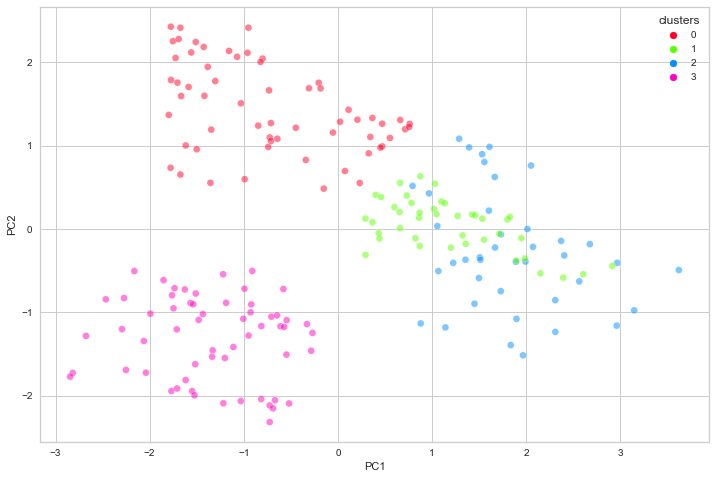

In [38]:
# graph before improvements

plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='clusters', alpha=0.5, palette='gist_rainbow', label = '')
#plt.savefig('clusters_bad.png', bbox_inches = 'tight', transparent = True)
plt.show()

In [39]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans(n_clusters=3)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=3))])

In [137]:
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os

In [54]:
import warnings
warnings.filterwarnings('ignore')

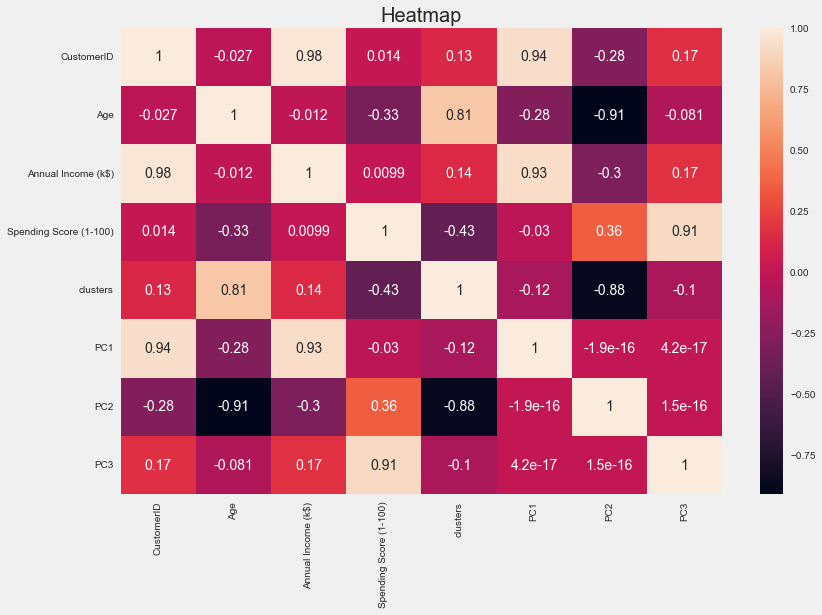

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap', fontsize = 20)
plt.show()

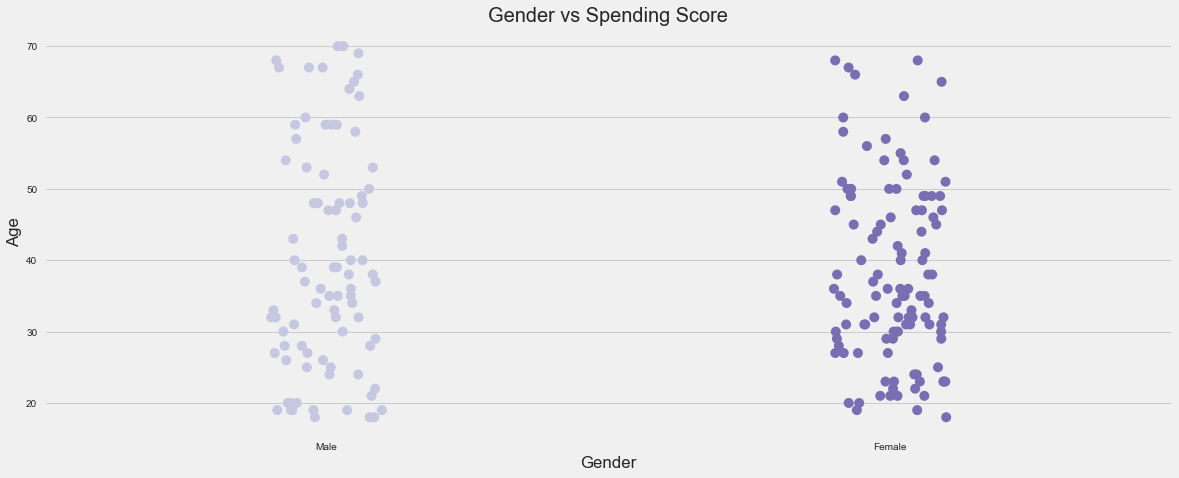

In [88]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['Gender'], df['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

In [66]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

In [99]:

# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os

In [101]:
desc = ff.create_table(df.describe())
py.iplot(desc)

In [102]:
df.isnull().any().any()

False

Text(0, 0.5, 'Count')

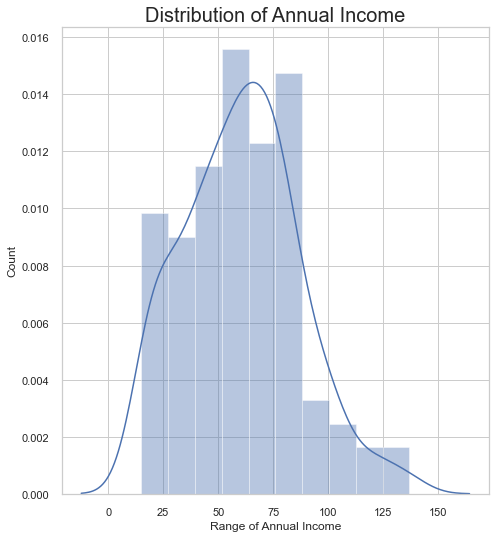

In [135]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

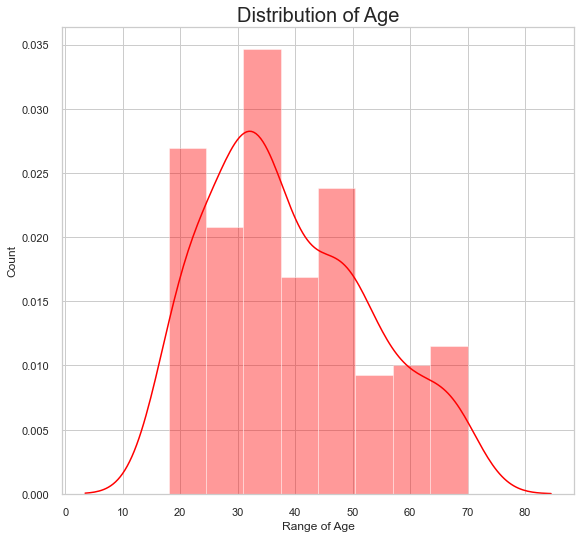

In [128]:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.savefig('Age_dist_2.png', bbox_inches = 'tight')
plt.show()

In [105]:
data=df

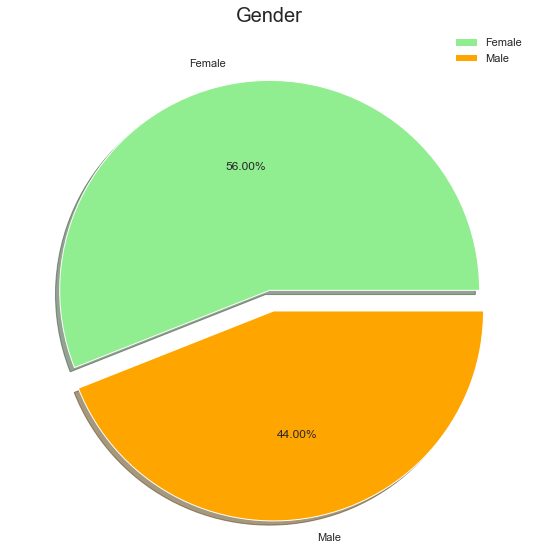

In [129]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

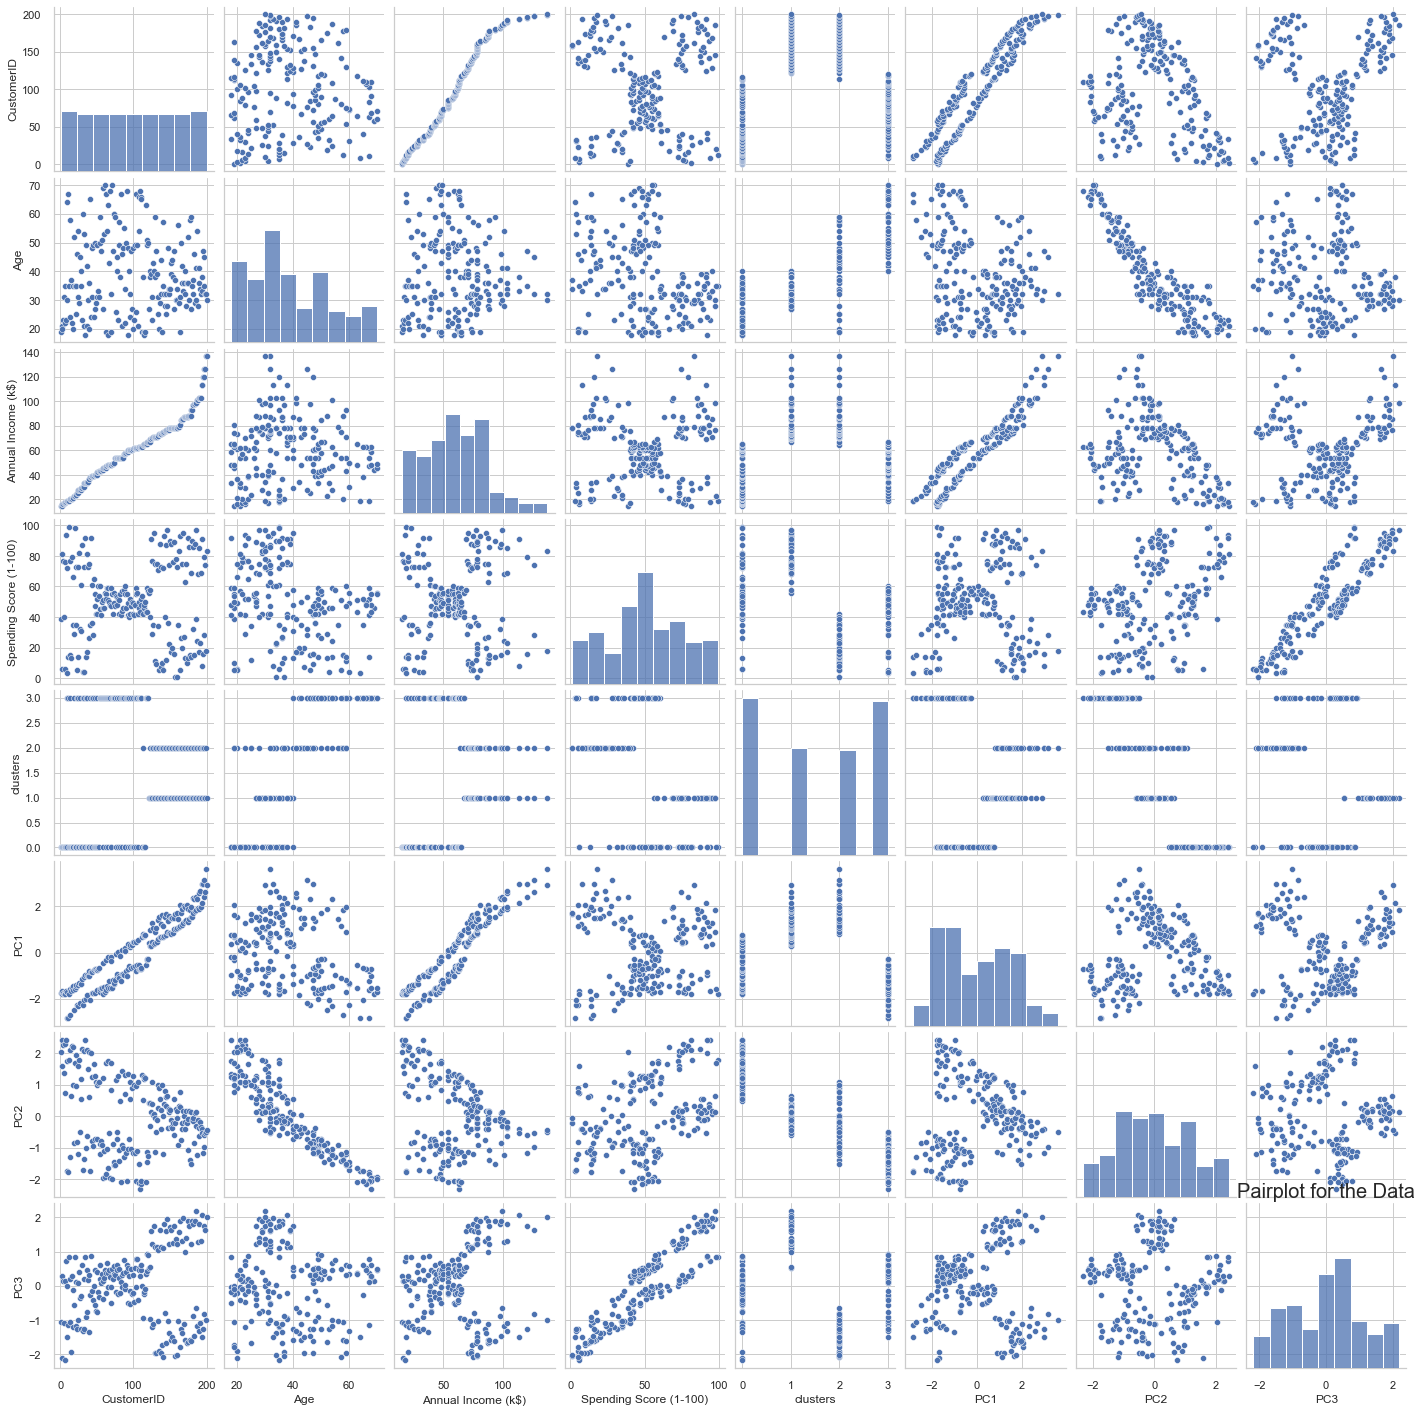

In [112]:
sns.pairplot(data, palette='plasma')
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

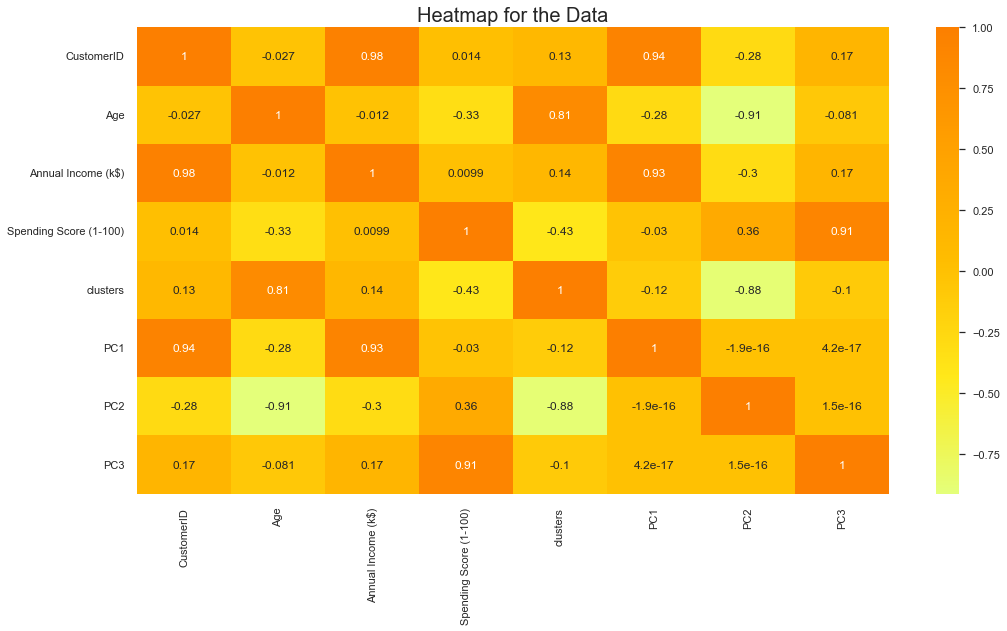

In [130]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.savefig('Heatmap_2.png', bbox_inches = 'tight')
plt.show()

In [118]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


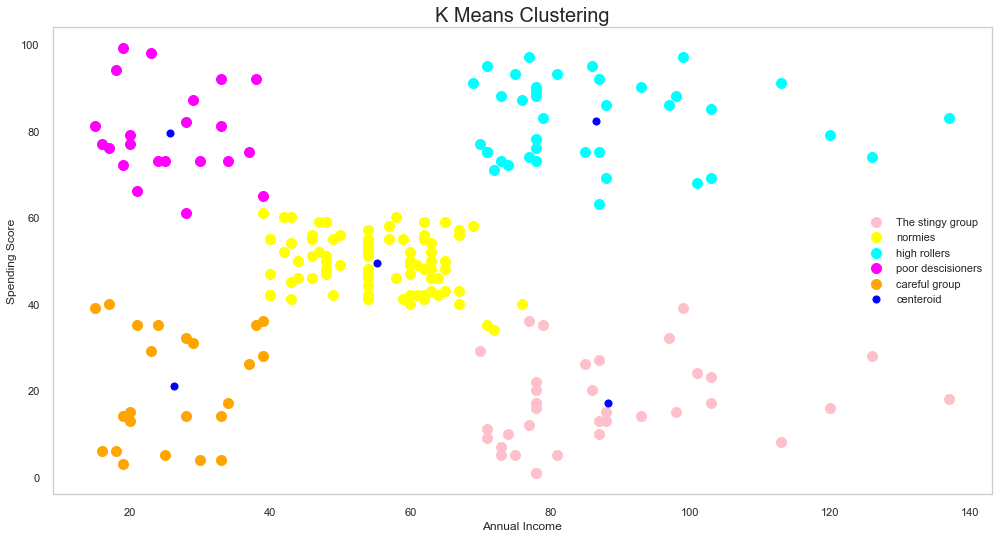

In [131]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'The stingy group')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'normies')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'high rollers')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'poor descisioners')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful group')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.savefig('KMeans_2.png', bbox_inches = 'tight')
plt.show()

In [ ]:
a